Instalamos e importamos opencv

In [1]:
!pip install opencv-python

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cv2

Para visualizar imágenes en Jupyter, es necesario usar *matplotlib*. Podemos instalarlo con el siguiente comando:

In [32]:
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
# Establecemos un tamaño de figura para visualizar mejor los resultados
plt.rcParams["figure.figsize"] = (8,8)

Leemos la imagen de ejemplo

In [4]:
str_img_prueba = "Fry.jpg"
image = cv2.imread(str_img_prueba)
print("Tamaño de imagen: "+str(image.shape))

Tamaño de imagen: (480, 640, 3)


La opencv para python representa las imágenes como un array de tres dimensiones. Usa la librería *numpy* para ello.

In [5]:
print(type(image))

<class 'numpy.ndarray'>


Para las distintas pruebas que iremos haciendo, obtenemos una versión en nivel de gris y otra suavizada.

In [6]:
gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gris, (3, 3))

Podemos mostrar las imágenes generadas:

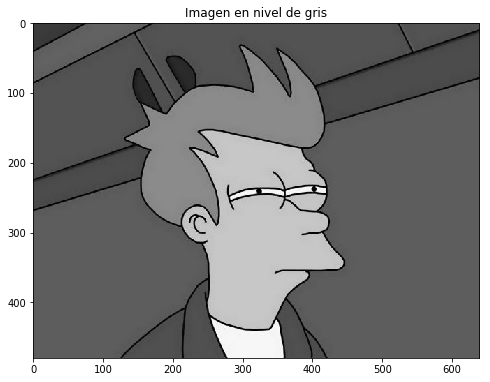

In [28]:
dummy = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title('Imagen en nivel de gris')
plt.show()

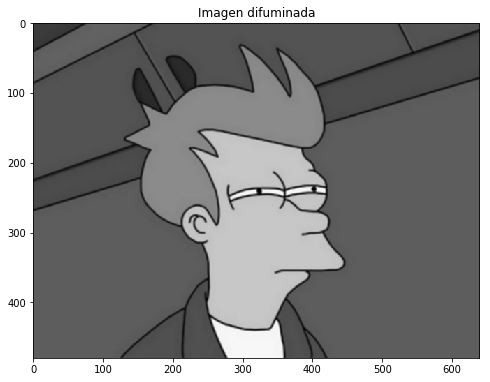

In [29]:
dummy = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title('Imagen difuminada')
plt.show()

Nota: ``blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)`` es necesario para que *matplotlib* sea capaz de mostrar las imágenes correctamente. Esto es debido a que la OpenCV lee las imágenes en formato BGR y matplotlib en RGB.

# 1. Canny

In [9]:
canny = cv2.Canny(blur, 10, 100)

# 2. Harris 

In [10]:
harris = cv2.cornerHarris(gris,2,3,0.04)
harris = cv2.dilate(harris,None) # Resalta (no necesario)

Para visualizar, normalizo entre 0 y 255. Aunque en Python devuelve el resultado, es necesario pasarle ``None`` como imagen destino.

In [11]:
harris = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX)               
harris = cv2.convertScaleAbs(harris, None)

Si umbralizamos (no necesario), podemos ver los valores mayores. 

Nota: En Python, *cv2.threshold* devuelve el valor de threshold pasado y la imagen resultado.

In [12]:
ret_val, harris_bin = cv2.threshold(harris, 128, 255, cv2.THRESH_BINARY)

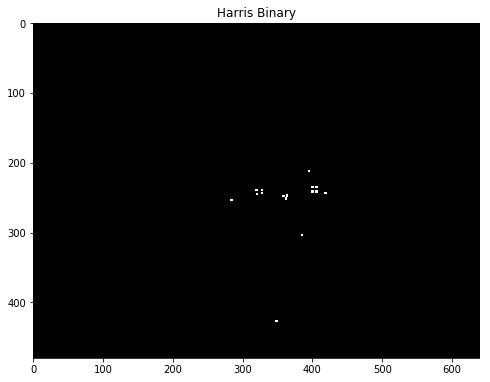

In [30]:
harris_bin = cv2.cvtColor(harris_bin, cv2.COLOR_BGR2RGB)
plt.imshow(harris_bin)
plt.title('Harris Binary')
plt.show()

# 3. HOG
Constructor por defecto.

block size: 16x16, window size: 64x128, 
stride size: 8x8, cell size: 8x8, 
number of bins: 9, descriptor size: 3780

In [14]:
hog = cv2.HOGDescriptor()

Otra opción sería indicar los tamaños de celda, bloque, etc.

In [15]:
win_size = (32,128)
cell_size = (8,8)                   
block_size = (16,16)
block_stride = (8,8)    
n_bins_orientacion = 9   
hog = cv2.HOGDescriptor(win_size,block_size,block_stride,cell_size,n_bins_orientacion)

Calculamos *hog* con el método *compute*:

In [16]:
descriptors = hog.compute(image)
print("""\nHOG ({0}): 
    block size: {1},
    window size: {2},
    stride size: {3},
    cell size: {4},
    number of bins: {5},
    descriptor size: {6}\n""".format(
    len(descriptors),
    hog.blockSize, 
    hog.winSize,
    hog.blockStride,
    hog.cellSize, 
    hog.nbins, hog.getDescriptorSize()))


HOG (5613300): 
    block size: (16, 16),
    window size: (32, 128),
    stride size: (8, 8),
    cell size: (8, 8),
    number of bins: 9,
    descriptor size: 1620



# 4. SIFT

La forma de crear los puntos SIFT sería la que se muestra a continuación, pero desde la versión 3.x no está en la distribución básica. Los descriptores SIFT, así como otros que están protegidos por derechos de autor, se encuentran en la extensión *opencv_contrib* (es necesario compilar a partir de las fuentes).

Nota: La siguiente celda de código produce un error por el motivo anteriormente explicado.

In [17]:
img_sift = image
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gris, None)
img_sift = cv2.drawKeypoints(gris,kp,img_sift)
cv2.imshow('Puntos SIFT', img_sift)
cv2.waitKey(0)

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


A modo de ejemplo, se calculan otros puntos sí disponibles en la distribución básica



In [18]:
fd  = cv2.FastFeatureDetector_create()
kp = fd.detect(gris, None);   
img_sift = cv2.drawKeypoints(gris, kp, None)

Mostramos resultados

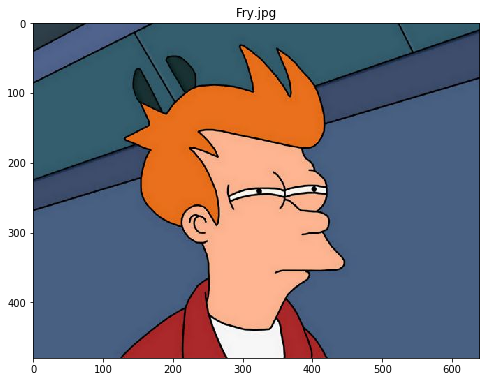

In [24]:
dummy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title(str_img_prueba)
plt.show()

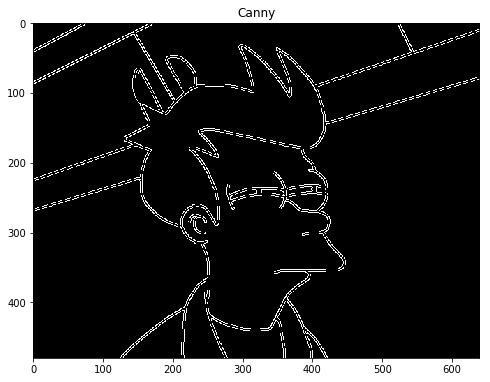

In [25]:
dummy = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title('Canny')
plt.show()

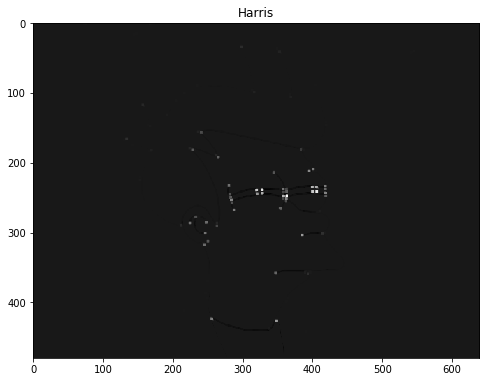

In [26]:
dummy = cv2.cvtColor(harris, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title('Harris')
plt.show()

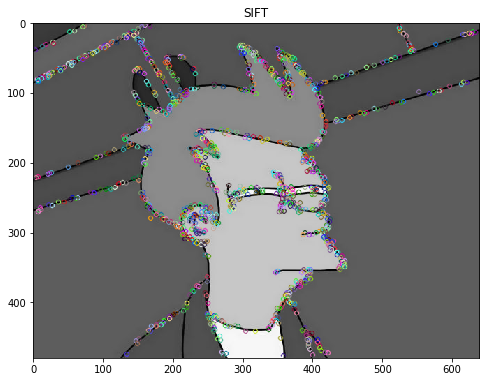

In [27]:
dummy = cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB)
plt.imshow(dummy)
plt.title('SIFT')
plt.show()

# 5. Clasificación

Importamos el notebook donde se encuentran las funciones necesarias para entrenar al clasificador de imágenes. Los detalles del mismo se pueden ver en *ejemplo_clasificador.ipynb*

In [31]:
import ejemplo_clasificador
ejemplo_clasificador.ejemplo_clasificador_imagenes()

Leidas 1916 imágenes de entrenamiento -> positivas
Leidas 2390 imágenes de entrenamiento -> negativas
Clasificador entrenado
Predicción: 1
